In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# grandparentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(currentdir)))) + '/python_utils'
grandparentdir = '/home/kss/_2022/MonteCarlo'
sys.path.insert(0, grandparentdir + '/python_utils') 

from Exact_Ising_model import *
from Draw_module_1  import *

In [72]:
alpha_crit_range_dict = {
                    "a=1"    :[1.58,1.64],
                    "a=1.5"  :[1.76,1.82],
                    "a=1.7"  :[1.82,1.88],
                    "a=1.8"  :[1.84,1.90],
                    "a=1.9"  :[1.86,1.92],
                    "a=2"    :[1.88,1.94],
                    "a=2.5"  :[1.96,2.02],
                    "a=3"    :[2.06,2.12],
                    "a=3.5"  :[2.08,2.14],
                    "a=100"  :[2.22,2.28],
}
alpha_crit_dict = {}
alpha_file_name_dict = {
                    "a=1"    :"1.000000",
                    "a=1.5"  :"1.500000",
                    "a=2"    :"2.000000",
                    "a=2.5"  :"2.500000",
                    "a=3"    :"3.000000",
                    "a=3.5"  :"3.500000",
                    "a=100"  :"100.000000",
}
def alpha_to_number(alpha):
    return float(alpha[2:])

# alpha_crit_range_dict_ideal = {
#                     "a=0.5"  :[1.34,1.38], 
#                     "a=0.75" :[1.50,1.54], 
#                     "a=1"    :[1.61,1.65], #checked
#                     "a=1.25" :[1.71,1.75], #checked
#                     "a=1.5"  :[1.78,1.82], #checked
#                     "a=1.75" :[1.84,1.88],
#                     "a=2"    :[1.90,1.94], #checked
#                     "a=2.25" :[1.95,1.99],
#                     "a=2.5"  :[1.98,2.02], #checked
#                     "a=2.75" :[2.02,2.06],
#                     "a=3"    :[2.07,2.11], #checked
#                     "a=3.25" :[2.08,2.12],
#                     "a=3.5"  :[2.10,2.14], #checked
#                     "a=3.75" :[2.13,2.17],
#                     "a=4"    :[2.15,2.19],
#                     "a=100"  :[2.25,2.29], #checked
# }
alpha_crit_dict = {
    'a=0.5': 1.355,
    'a=0.75': 1.515,
    'a=1': 1.63,
    'a=1.25': 1.725,
    'a=1.5': 1.795,
    'a=1.75': 1.86,
    'a=2': 1.92,
    'a=2.25': 1.965,
    'a=2.5': 2.005,
    'a=2.75': 2.04,
    'a=3': 2.075,
    'a=3.25': 2.1,
    'a=3.5': 2.125,
    'a=3.75': 2.145,
    'a=4.0': 2.165,
    'a=100': 2.27
}

In [5]:
from genericpath import exists
import os

def input_data_generator(save_path, folder_name, lattice, equil, mcs, Tsrt, Tfin, alpha,
                        kBin = 21, kB = 0, kJx = 1, kJy = -1, isTinf = 0, Random = 0):
    path_f = save_path + '/' + folder_name
    if not os.path.exists(path_f):
        os.mkdir(path_f)
    for i, Lsize in enumerate(lattice):
        file_name = "data" + str(i+1) + ".txt"
        file = open(path_f + "/" + file_name, "w")
        file.write("kLx             = {}\n".format(Lsize))
        file.write("kLy             = {}\n".format(Lsize))
        file.write("\n")
        file.write("kBin            = {}\n".format(kBin))
        file.write("\n")
        file.write("kB              = {}\n".format(kB))
        file.write("kJx             = {}\n".format(kJx))
        file.write("kJy             = {}\n".format(kJy))
        file.write("alpha           = {}\n".format(alpha))
        file.write("\n")
        file.write("Tsrt            = {}\n".format(Tsrt))
        file.write("Tfin            = {}\n".format(Tfin))
        file.write("\n")
        file.write("isTinf          = {}\n".format(isTinf))
        file.write("Random          = {}\n".format(Random))
        file.write("\n")
        file.write("equil_time_base = {}\n".format(equil[Lsize]))
        file.write("mcs             = {}\n".format(mcs[Lsize]))
        file.close()     




In [38]:
# path    = "./"
# lattice = [16,32,48,64,80]
# alpha   = [1,1.5,2,2.5,3,3.5,100]
# equil_dict = {16:300000,32:300000,48:300000,64:300000,80:300000}
# mcs_dict   = {16:5000000,32:5000000,48:5000000,64:8000000,80:8000000}

# alpha_crit_range_dict_ideal = {
#                     "a=1"    :[1.61,1.65], #checked
#                     "a=1.5"  :[1.78,1.82], #checked
#                     "a=1.7"  :[1.83,1.87],
#                     "a=1.8"  :[1.85,1.89],
#                     "a=1.9"  :[1.87,1.91],
#                     "a=2"    :[1.90,1.94], #checked
#                     "a=2.5"  :[1.98,2.02], #checked
#                     "a=3"    :[2.07,2.11], #checked
#                     "a=3.5"  :[2.10,2.14], #checked
#                     "a=100"  :[2.25,2.29], #checked
# }

# for i in range(len(alpha)):
#     folder_name = "0830_" + str(i)
#     input_data_generator('../Input',folder_name,lattice,equil_dict,mcs_dict,*alpha_crit_range_dict_ideal["a="+str(alpha[i])],alpha[i])

In [80]:
path    = "./"
lattice = [16,32,48,64,80]
alpha2   = [0.5,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4]
equil_dict = {16:300000,32:300000,48:300000,64:300000,80:300000}
mcs_dict   = {16:5000000,32:5000000,48:5000000,64:8000000,80:8000000}

alpha_crit_range_dict_ideal = {
                    "a=0.5"  :[1.34,1.38], 
                    "a=0.75" :[1.50,1.54], 
                    "a=1"    :[1.61,1.65], #checked
                    "a=1.25" :[1.71,1.75], #checked
                    "a=1.5"  :[1.78,1.82], #checked
                    "a=1.75" :[1.84,1.88],
                    "a=2"    :[1.90,1.94], #checked
                    "a=2.25" :[1.95,1.99],
                    "a=2.5"  :[1.98,2.02], #checked
                    "a=2.75" :[2.02,2.06],
                    "a=3"    :[2.07,2.11], #checked
                    "a=3.25" :[2.08,2.12],
                    "a=3.5"  :[2.10,2.14], #checked
                    "a=3.75" :[2.13,2.17],
                    "a=4"    :[2.15,2.19],
                    "a=100"  :[2.25,2.29], #checked
}

for i in range(len(alpha2)):
    folder_name = "0901_" + str(i)
    input_data_generator('../Input',folder_name,lattice,equil_dict,mcs_dict,*alpha_crit_range_dict_ideal["a="+str(alpha2[i])],alpha2[i])

In [84]:
runnablefile = "AA_Metropolis_Jackknife.out"
inputpath    = "./Input"
folder_prefix= "0901"
iterate      = 5
idx = 3
for i in range(iterate):
    print("./{} {}/{}_{}/data{}.txt;".format(runnablefile,inputpath,folder_prefix,idx,i+1),end=" ")

./AA_Metropolis_Jackknife.out ./Input/0901_2/data1.txt; ./AA_Metropolis_Jackknife.out ./Input/0901_2/data2.txt; ./AA_Metropolis_Jackknife.out ./Input/0901_2/data3.txt; ./AA_Metropolis_Jackknife.out ./Input/0901_2/data4.txt; ./AA_Metropolis_Jackknife.out ./Input/0901_2/data5.txt; 

In [7]:
parsing_dict, alpha_list = parsing_helper("./0831_finding_tc/")

In [68]:
alpha_list

['a=0.5',
 'a=0.75',
 'a=1.25',
 'a=1.75',
 'a=2.25',
 'a=2.75',
 'a=3.25',
 'a=3.75',
 'a=4.0']

In [52]:
parsing_dict['a=1']

[['./0705/a=1/AA_Metropolis_c_16_16_int31_mcs2000000_a1.000000_Test__1.csv',
  './0705/a=1/AA_Metropolis_c_32_32_int31_mcs2000000_a1.000000_Test__1.csv',
  './0705/a=1/AA_Metropolis_c_48_48_int31_mcs2000000_a1.000000_Test__1.csv',
  './0705/a=1/AA_Metropolis_c_64_64_int31_mcs2000000_a1.000000_Test__1.csv',
  './0705/a=1/AA_Metropolis_c_96_96_int31_mcs2000000_a1.000000_Test__1.csv'],
 [16, 32, 48, 64, 96],
 [31, 31, 31, 31, 31],
 [2000000, 2000000, 2000000, 2000000, 2000000]]

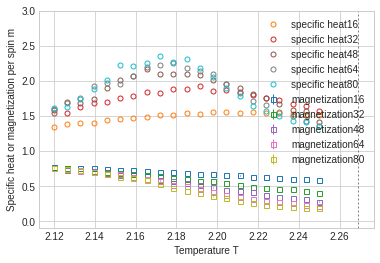

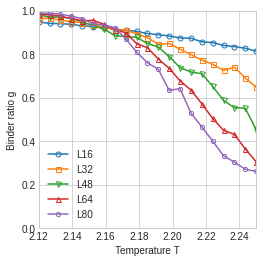

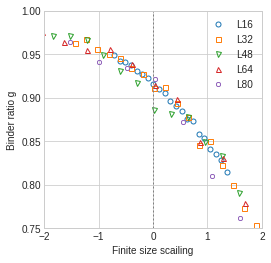

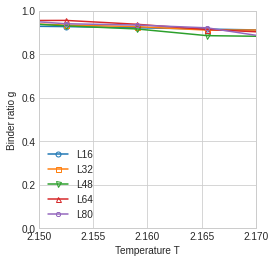

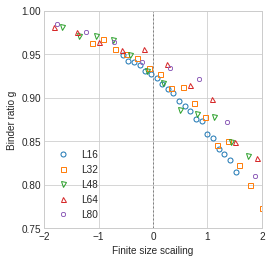

In [67]:
alpha = alpha_list[8]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],yliml=(0,1),Tc = 2.165)
draw_binder_FFS(*parsing_dict[alpha],xliml=(2.15,2.17),yliml=(0,1),Tc = 2.155)

alpha_crit_dict[alpha] = 2.165

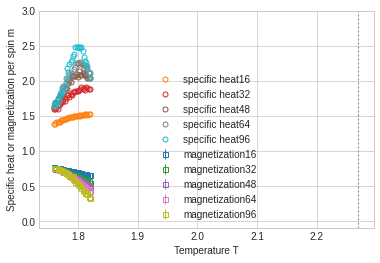

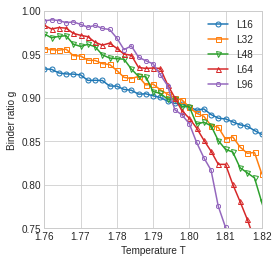

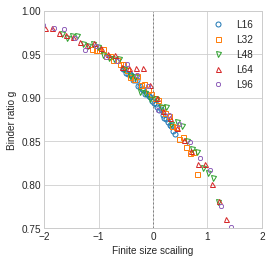

In [54]:
alpha = alpha_list[1]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 1.795)
alpha_crit_dict[alpha] = 1.795

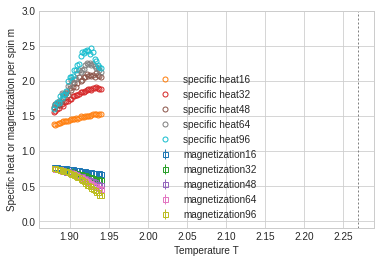

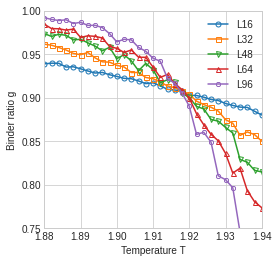

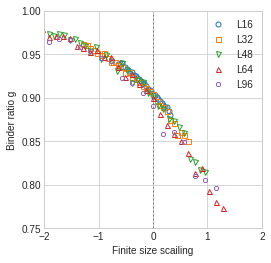

In [55]:
alpha = alpha_list[2]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 1.92)
alpha_crit_dict[alpha] = 1.92

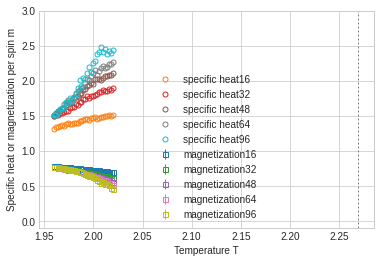

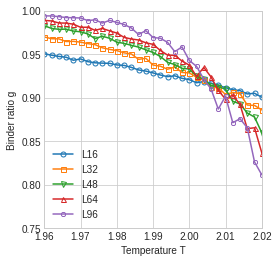

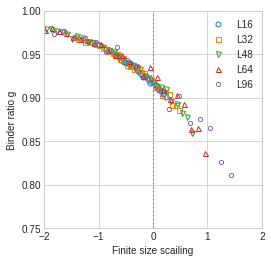

In [56]:
alpha = alpha_list[3]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.005)
alpha_crit_dict[alpha] = 2.005

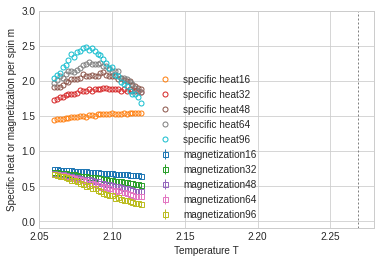

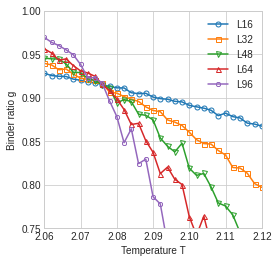

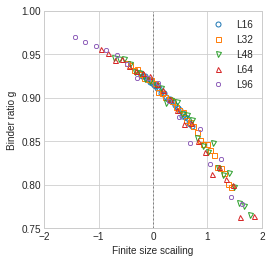

In [57]:
alpha = alpha_list[4]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.075)
alpha_crit_dict[alpha] = 2.075

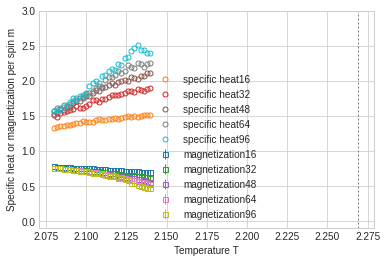

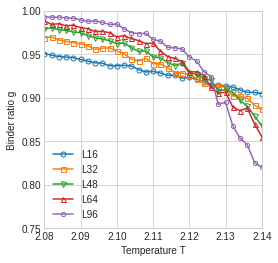

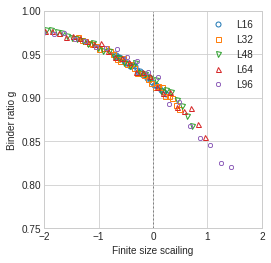

In [58]:
alpha = alpha_list[5]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.125)
alpha_crit_dict[alpha] = 2.125

In [59]:
alpha = alpha_list[6]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.27)
alpha_crit_dict[alpha] = 2.27

IndexError: list index out of range

(0.5, 4.0)

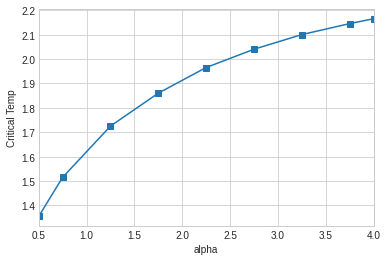

In [79]:
# critical_T = [1.62,1.79,1.91,2.0,2.08,2.12,2.27]
critical_T = []
alpha_num  = []
for alpha in alpha_list:
    alpha_num.append(alpha_to_number(alpha))
    critical_T.append(alpha_crit_dict[alpha])

plt.plot(alpha_num,critical_T,"-s")
plt.xlabel("alpha")
plt.ylabel("Critical Temp")
plt.xlim(0.5,4)

(0.5, 4.0)

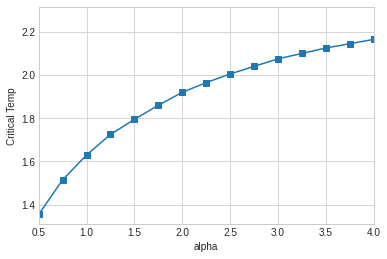

In [77]:
# critical_T = [1.62,1.79,1.91,2.0,2.08,2.12,2.27]
critical_T = []
alpha_num  = []
for alpha in alpha_crit_dict.keys():
    alpha_num.append(alpha_to_number(alpha))
    critical_T.append(alpha_crit_dict[alpha])

plt.plot(alpha_num,critical_T,"-s")
plt.xlabel("alpha")
plt.ylabel("Critical Temp")
plt.xlim(0.5,4)

In [ ]:
alpha_crit_dict

{'a=1': 1.63,
 'a=1.5': 1.795,
 'a=2.5': 2.005,
 'a=3': 2.075,
 'a=3.5': 2.125,
 'a=100': 2.27,
 'a=2': 1.92}

In [ ]:
alpha_crit_dict_sparse = {"a=1.7":1.85,"a=1.8":1.87,"a=1.9":1.89}

In [ ]:
parsing_dict_2, alpha_list_2 = parsing_helper("./0818/")

In [ ]:
alpha_list_2
## 1.85, 1.87, 1.89 

['a=1.7', 'a=1.8', 'a=1.9']

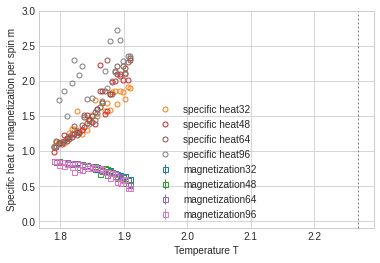

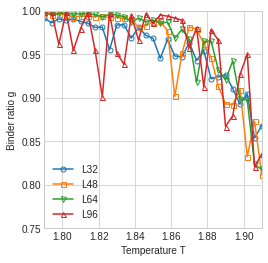

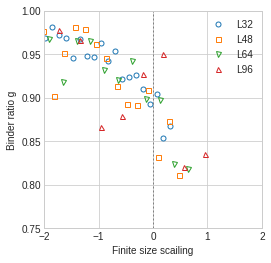

In [ ]:
alpha = alpha_list_2[2]
draw_multi(*parsing_dict_2[alpha])
draw_binder_FFS(*parsing_dict_2[alpha],(1.79,1.91), Tc = 1.9)
alpha_crit_dict[alpha] = 2.27

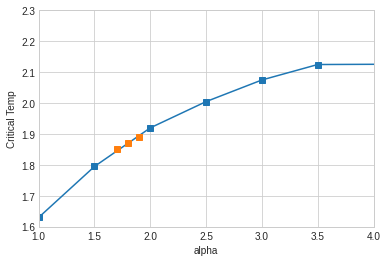

In [ ]:
# critical_T = [1.62,1.79,1.91,2.0,2.08,2.12,2.27]
critical_T2 = []
alpha_num2  = []
for alpha in alpha_list_2:
    alpha_num2.append(alpha_to_number(alpha))
    critical_T2.append(alpha_crit_dict_sparse[alpha])

plt.plot(alpha_num,critical_T,"-s")
plt.plot(alpha_num2,critical_T2,"s")
plt.xlabel("alpha")
plt.ylabel("Critical Temp")
plt.xlim(1,4)
plt.savefig("0818_phase_diagram.png")